In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.linalg import eigh as eig
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import confusion_matrix, classification_report

In [2]:
tired = pd.read_csv("tired.csv")
burping = pd.read_csv("burping.csv")
hungry = pd.read_csv("hungry.csv")
discomfort = pd.read_csv("discomfort.csv")
belly_pain = pd.read_csv("belly_pain.csv")
tired_test = pd.read_csv("tired_test.csv")
burping_test = pd.read_csv("burping_test.csv")
hungry_test = pd.read_csv("hungry_test.csv")
discomfort_test = pd.read_csv("discomfort_test.csv")
belly_pain_test = pd.read_csv("belly_pain_test.csv")
print(tired.shape)
print(tired_test.shape)

(252, 79)
(156, 79)


In [3]:
tired_corr = tired.corr()
burping_corr = burping.corr()
hungry_corr = hungry.corr()
discomfort_corr = discomfort.corr()
belly_pain_corr = belly_pain.corr()
tired_test_corr = tired_test.corr()
burping_test_corr = burping_test.corr()
hungry_test_corr = hungry_test.corr()
discomfort_test_corr = discomfort_test.corr()
belly_pain_test_corr = belly_pain_test.corr()

In [4]:
tired_eigen_values, tired_eigen_vectors = eig(tired_corr)
sorted_index = np.argsort(tired_eigen_values)[::-1]
tired_eigen_values = tired_eigen_values[sorted_index]
tired_eigen_vectors = tired_eigen_vectors[:,sorted_index]
burping_eigen_values, burping_eigen_vectors = eig(burping_corr)
sorted_index = np.argsort(burping_eigen_values)[::-1]
burping_eigen_values = burping_eigen_values[sorted_index]
burping_eigen_vectors = burping_eigen_vectors[:,sorted_index]
hungry_eigen_values, hungry_eigen_vectors = eig(hungry_corr)
sorted_index = np.argsort(hungry_eigen_values)[::-1]
hungry_eigen_values = hungry_eigen_values[sorted_index]
hungry_eigen_vectors = hungry_eigen_vectors[:,sorted_index]
discomfort_eigen_values, discomfort_eigen_vectors = eig(discomfort_corr)
sorted_index = np.argsort(discomfort_eigen_values)[::-1]
discomfort_eigen_values = discomfort_eigen_values[sorted_index]
discomfort_eigen_vectors = discomfort_eigen_vectors[:,sorted_index]
belly_pain_eigen_values, belly_pain_eigen_vectors = eig(belly_pain_corr)
sorted_index = np.argsort(belly_pain_eigen_values)[::-1]
belly_pain_eigen_values = belly_pain_eigen_values[sorted_index]
belly_pain_eigen_vectors = belly_pain_eigen_vectors[:,sorted_index]

tired_test_eigen_values, tired_test_eigen_vectors = eig(tired_test_corr)
sorted_index = np.argsort(tired_test_eigen_values)[::-1]
tired_test_eigen_values = tired_test_eigen_values[sorted_index]
tired_test_eigen_vectors = tired_test_eigen_vectors[:,sorted_index]
burping_test_eigen_values, burping_test_eigen_vectors = eig(burping_test_corr)
sorted_index = np.argsort(burping_test_eigen_values)[::-1]
burping_test_eigen_values = burping_test_eigen_values[sorted_index]
burping_test_eigen_vectors = burping_test_eigen_vectors[:,sorted_index]
hungry_test_eigen_values, hungry_test_eigen_vectors = eig(hungry_test_corr)
sorted_index = np.argsort(hungry_test_eigen_values)[::-1]
hungry_test_eigen_values = hungry_test_eigen_values[sorted_index]
hungry_test_eigen_vectors = hungry_test_eigen_vectors[:,sorted_index]
discomfort_test_eigen_values, discomfort_test_eigen_vectors = eig(discomfort_test_corr)
sorted_index = np.argsort(discomfort_test_eigen_values)[::-1]
discomfort_test_eigen_values = discomfort_test_eigen_values[sorted_index]
discomfort_test_eigen_vectors = discomfort_test_eigen_vectors[:,sorted_index]
belly_pain_test_eigen_values, belly_pain_test_eigen_vectors = eig(belly_pain_test_corr)
sorted_index = np.argsort(belly_pain_test_eigen_values)[::-1]
belly_pain_test_eigen_values = belly_pain_test_eigen_values[sorted_index]
belly_pain_test_eigen_vectors = belly_pain_test_eigen_vectors[:,sorted_index]

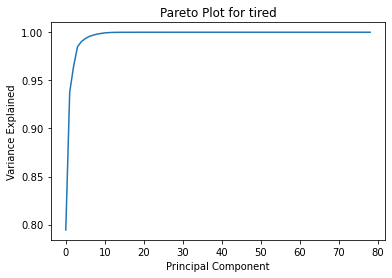

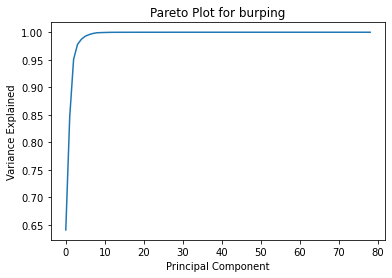

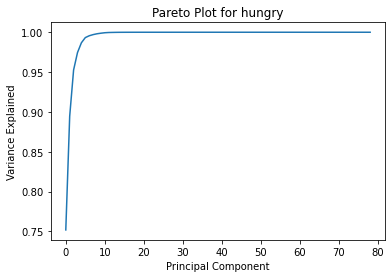

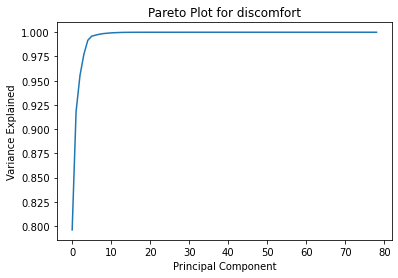

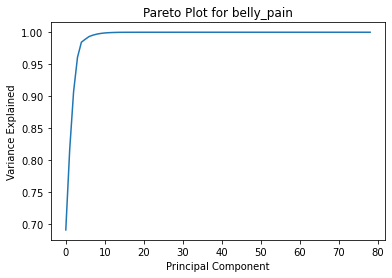

In [5]:
for X, l in zip([tired_corr, burping_corr, hungry_corr, discomfort_corr, belly_pain_corr], ["tired", "burping", "hungry", "discomfort", "belly_pain"]):
    # Fit PCA on X
    pca = PCA().fit(X)

    # Plot Scree Plot
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title(f'Pareto Plot for {l}')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()

In [6]:
k = 11
tired_principal_components = tired_eigen_vectors[:,:k]
hungry_principal_components = hungry_eigen_vectors[:,:k]
burping_principal_components = burping_eigen_vectors[:,:k]
discomfort_principal_components = discomfort_eigen_vectors[:,:k]
belly_pain_principal_components = belly_pain_eigen_vectors[:,:k]

tired_test_principal_components = tired_test_eigen_vectors[:,:k]
hungry_test_principal_components = hungry_test_eigen_vectors[:,:k]
burping_test_principal_components = burping_test_eigen_vectors[:,:k]
discomfort_test_principal_components = discomfort_test_eigen_vectors[:,:k]
belly_pain_test_principal_components = belly_pain_test_eigen_vectors[:,:k]

In [7]:
tired_PC = np.matmul(tired_principal_components.T, tired_corr)
hungry_PC = np.matmul(hungry_principal_components.T, hungry_corr)
burping_PC = np.matmul(burping_principal_components.T, burping_corr)
discomfort_PC = np.matmul(discomfort_principal_components.T, discomfort_corr)
belly_pain_PC = np.matmul(belly_pain_principal_components.T, belly_pain_corr)

tired_test_PC = np.matmul(tired_test_principal_components.T, tired_test_corr)
hungry_test_PC = np.matmul(hungry_test_principal_components.T, hungry_test_corr)
burping_test_PC = np.matmul(burping_test_principal_components.T, burping_test_corr)
discomfort_test_PC = np.matmul(discomfort_test_principal_components.T, discomfort_test_corr)
belly_pain_test_PC = np.matmul(belly_pain_test_principal_components.T, belly_pain_test_corr)

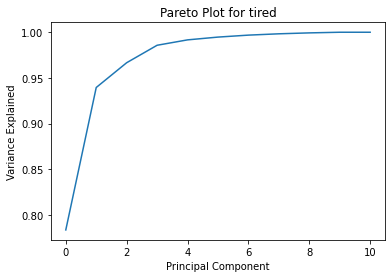

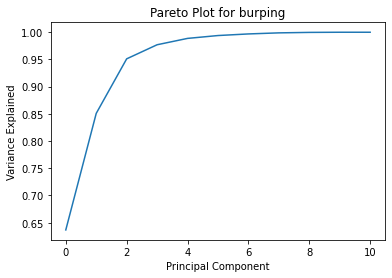

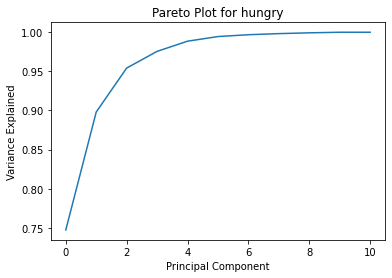

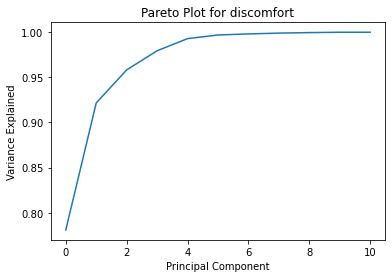

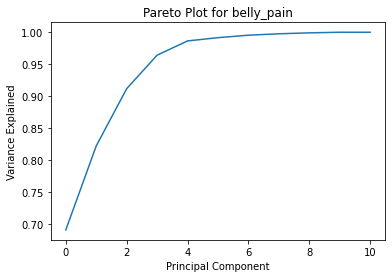

In [8]:
for X, l in zip([tired_PC, burping_PC, hungry_PC, discomfort_PC, belly_pain_PC], ["tired", "burping", "hungry", "discomfort", "belly_pain"]):
    # Fit PCA on X
    pca = PCA().fit(X)

    # Plot Pareto Plot
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.title(f'Pareto Plot for {l}')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.show()

In [9]:
tired_df = pd.DataFrame(tired_PC)
tired_labels = []
for i in range(k):
    tired_labels.append("tired")
tired_df["Labels"] = tired_labels
tired_test_df = pd.DataFrame(tired_test_PC)
tired_test_df["Labels"] = tired_labels

hungry_df = pd.DataFrame(hungry_PC)
hungry_labels = []
for i in range(k):
    hungry_labels.append("hungry")
hungry_df["Labels"] = hungry_labels
hungry_test_df = pd.DataFrame(hungry_test_PC)
hungry_test_df["Labels"] = hungry_labels

burping_df = pd.DataFrame(burping_PC)
burping_labels = []
for i in range(k):
    burping_labels.append("burping")
burping_df["Labels"] = burping_labels
burping_test_df = pd.DataFrame(burping_test_PC)
burping_test_df["Labels"] = burping_labels

discomfort_df = pd.DataFrame(discomfort_PC)
discomfort_labels = []
for i in range(k):
    discomfort_labels.append("discomfort")
discomfort_df["Labels"] = discomfort_labels 
discomfort_test_df = pd.DataFrame(discomfort_test_PC)
discomfort_test_df["Labels"] = discomfort_labels

belly_pain_df = pd.DataFrame(belly_pain_PC)
belly_pain_labels = []
for i in range(k):
    belly_pain_labels.append("belly_pain")
belly_pain_df["Labels"] = belly_pain_labels
belly_pain_test_df = pd.DataFrame(belly_pain_test_PC)
belly_pain_test_df["Labels"] = belly_pain_labels


In [10]:
frames = [tired_df, hungry_df, burping_df, discomfort_df, belly_pain_df]
test_frames = [tired_test_df, hungry_test_df, burping_test_df, discomfort_test_df, belly_pain_test_df]
x_train = pd.concat(frames)
x_test = pd.concat(test_frames)

y_train = x_train["Labels"].values
y_test = x_test["Labels"].values
x_train = x_train.drop(["Labels"], axis=1)
x_test = x_test.drop(["Labels"], axis=1)

In [11]:
grid_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(KNeighborsClassifier(), grid_params, cv=5, n_jobs=-1)
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11, 15],
                         'weights': ['uniform', 'distance']})

Model Score: 0.10909090909090909


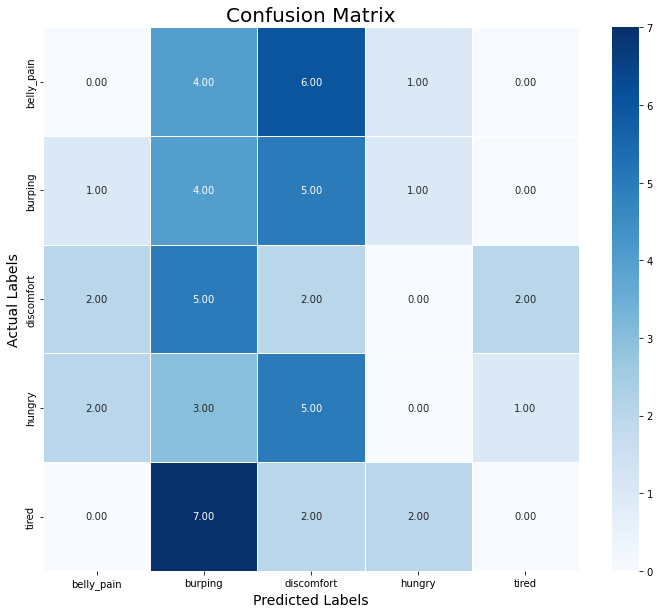

              precision    recall  f1-score   support

  belly_pain       0.00      0.00      0.00        11
     burping       0.17      0.36      0.24        11
  discomfort       0.10      0.18      0.13        11
      hungry       0.00      0.00      0.00        11
       tired       0.00      0.00      0.00        11

    accuracy                           0.11        55
   macro avg       0.05      0.11      0.07        55
weighted avg       0.05      0.11      0.07        55

Confusion Matrix: 
[[0 4 6 1 0]
 [1 4 5 1 0]
 [2 5 2 0 2]
 [2 3 5 0 1]
 [0 7 2 2 0]]


In [12]:
print(f'Model Score: {model.score(x_test, y_test)}')

y_predict = model.predict(x_test)

cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(12, 10))
encoder = OneHotEncoder()
y_en = encoder.fit_transform(np.array(y_test).reshape(-1, 1)).toarray()

cm = pd.DataFrame(cm, index=[i for i in encoder.categories_], columns=[i for i in encoder.categories_])

sns.heatmap(cm, linecolor="white", cmap="Blues", linewidths=1, annot=True, fmt=".2f")

plt.title("Confusion Matrix", size=20)
plt.xlabel("Predicted Labels", size=14)
plt.ylabel("Actual Labels", size=14)
plt.show()
print(classification_report(y_test, y_predict))
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')